In [2]:
import os
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt':
    font_family="Malgun Gothic"
else: font_family = "AppleGothic"
sns.set(font=font_family, rc={"axes.unicode_minus":False})

In [3]:
norm = stats.norm(loc=70, scale=10)

s_x = np.linspace(-10, 150, 2000)
s_pdf=norm.pdf(s_x)

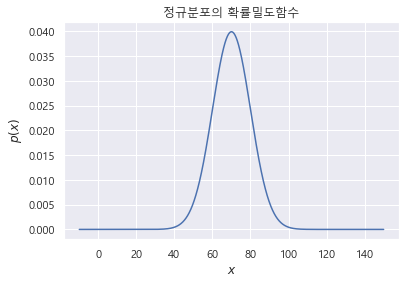

In [4]:
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

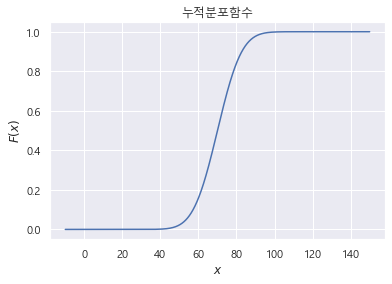

In [5]:
s_cdf = norm.cdf(s_x)

plt.plot(s_x,s_cdf)
plt.title("누적분포함수")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

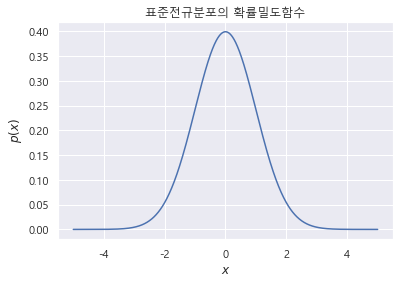

In [6]:
stan_norm= stats.norm(loc=0, scale=1)
sn_x=np.linspace(-5,5,1000)
sn_pdf=stan_norm.pdf(sn_x)

plt.plot(sn_x, sn_pdf)
plt.title("표준전규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [8]:
n_data=np.random.randint(1,100,size=1000)
n_data = np.sort(n_data)
n_data.shape

(1000,)

In [10]:
n_mean=np.mean(n_data)
print('mean:',np.mean(n_data))
n_std=np.std(n_data)
print('standard devation:',np.std(n_data))

mean: 50.053
standard devation: 28.62886988688167


In [11]:
norm_n_data = stats.norm(loc=n_mean, scale=n_std)
n_pdf = norm_n_data.pdf(n_data)
n_data.shape

(1000,)

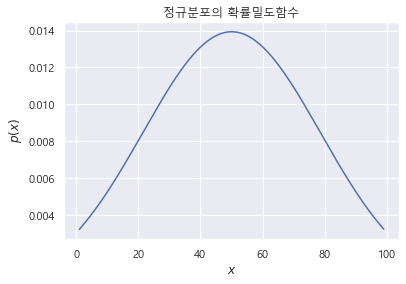

In [12]:
plt.plot(n_data, n_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [13]:
z_data=list(n_data)
z_data_list=[]
for i in z_data:
    z=(i-n_mean) / n_std
    z_data_list.append(z)

In [14]:
norm_z_data = stats.norm(loc=0, scale=1)
z_pdf=norm_z_data.pdf(z_data_list)

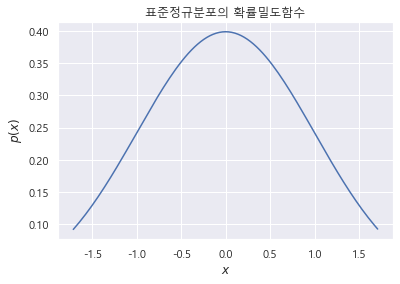

In [15]:
plt.plot(z_data_list, z_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

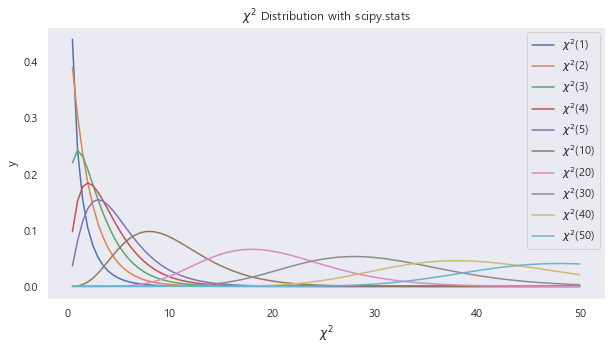

In [19]:
from scipy.stats import chi2
Chi_X =np.linspace(0.5, 50,100)
plt.figure(figsize=(10,5))
for dof in [1,2,3,4,5,10,20,30,40,50]:
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X), label=r'$\chi^2$(' +str(dof) + ')')
plt.xlabel(r'$\chi^2$')
plt.ylabel("y")
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [20]:
x_o=[324,78,261]
x_e = [371,80,212]

x_crosstab=pd.DataFrame([x_o, x_e], columns=['서울','인천','대구'], index=['관찰도수','기대도수'])

In [21]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [22]:
from scipy.stats import chisquare

result=chisquare(x_o, f_exp=x_e)
result

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

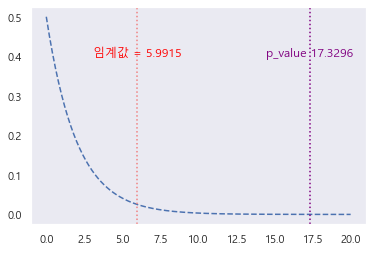

In [26]:
from scipy.stats import chi2

dof=2
x_chi_l=np.linspace(0,20,201)
pdf_chi=chi2(dof).pdf(x_chi_l)
                      
x95_c=chi2(dof).ppf(.95)
plt.plot(x_chi_l,pdf_chi, 'b--')

plt.axvline(x=x95_c, color='lightcoral', linestyle=':')
plt.text(x95_c, .4, '임계값 = '+str(round(x95_c,4)),horizontalalignment='center', color='red')


plt.axvline(x=result[0], color='purple', linestyle=':')
plt.text(result[0], .4, 'p_value '+str(round(result[0],4)),horizontalalignment='center', color='purple')
plt.grid()
plt.show()